# INTRODUCTION
Task as a part of internship at THE SPARKS FOUNDATION (TSF) under Graduate Rotational Internship Program (GRIP) March 2022.

Task #6 : Prediction Tsing Decision Tree

By Ahmed Shabaan

# Importing dependecies

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Loadind And Understanding Data

In [2]:
data = pd.read_csv('iris.csv')

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
print('numper of raws =',data.shape[0])
print('mumber of columns =',data.shape[1])

numper of raws = 150
mumber of columns = 6


In [5]:
columns = data.columns.tolist()
columns

['Id',
 'SepalLengthCm',
 'SepalWidthCm',
 'PetalLengthCm',
 'PetalWidthCm',
 'Species']

In [6]:
data.describe().style.background_gradient(cmap="BuPu_r")

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

# Pre_processing data

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le= LabelEncoder()

data['Species']= le.fit_transform(data['Species'])

In [12]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [13]:
data.drop('Id', axis = 1 )

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# spliting data

In [14]:
X = data.iloc[:,1:-1]

In [15]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [16]:
y = data.iloc[:,-1]

In [17]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=30)

In [20]:
print('X_train size =', X_train.shape)
print('X_tset size =', X_test.shape)
print('y_train size =', y_train.shape)
print('y_test size =', y_test.shape)

X_train size = (120, 4)
X_tset size = (30, 4)
y_train size = (120,)
y_test size = (30,)


# Bulding The Model 

In [21]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [22]:
model.fit(X_train , y_train)

DecisionTreeClassifier()

In [23]:
y_pred = model.predict(X_test)

In [24]:
y_pred

array([0, 0, 0, 2, 1, 1, 2, 2, 1, 2, 0, 2, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 2, 2, 2, 2, 0, 1])

In [25]:
y_test=np.array(y_test)
y_test

array([0, 0, 0, 2, 1, 1, 2, 2, 1, 2, 0, 2, 1, 1, 0, 1, 0, 0, 0, 1, 2, 0,
       0, 0, 2, 2, 1, 2, 0, 1])

# Model Evaluation 

In [26]:
from sklearn.metrics import accuracy_score
model_accuracy = accuracy_score(y_pred, y_test)

In [27]:
model_accuracy

0.9333333333333333

In [50]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

array([[12,  0,  0],
       [ 0,  8,  1],
       [ 0,  1,  8]], dtype=int64)

In [29]:
from sklearn.metrics import classification_report
report = classification_report(y_pred, y_test)

In [30]:
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.89      0.89      0.89         9
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



# Ploting The Tree

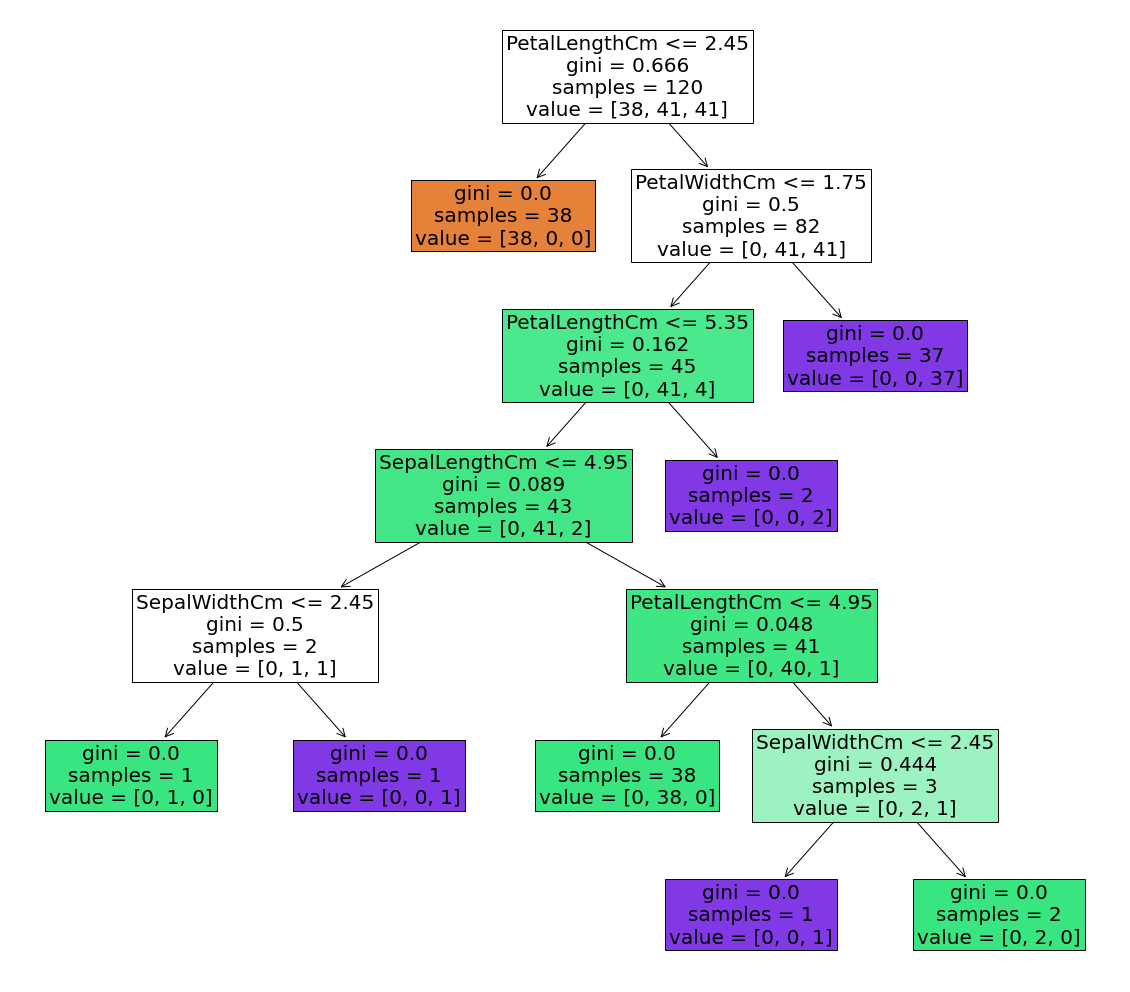

In [44]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,18))
visualization = plot_tree(model, feature_names = X.columns,filled = True, fontsize=20)